In [51]:
import pandas as pd

# Sample data
data = {
    'Height': [
        150, 160, 170, 175, 180, 165, 158, 162, 172, 168,
        155, 178, 182, 155, 173, 169, 164, 177, 159, 161
    ],
    'Weight': [
        50, 60, 70, 75, 80, 65, 55, 63, 72, 68,
        52, 78, 85, 53, 74, 69, 66, 80, 57, 62
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

print(df)




    Height  Weight
0      150      50
1      160      60
2      170      70
3      175      75
4      180      80
5      165      65
6      158      55
7      162      63
8      172      72
9      168      68
10     155      52
11     178      78
12     182      85
13     155      53
14     173      74
15     169      69
16     164      66
17     177      80
18     159      57
19     161      62


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

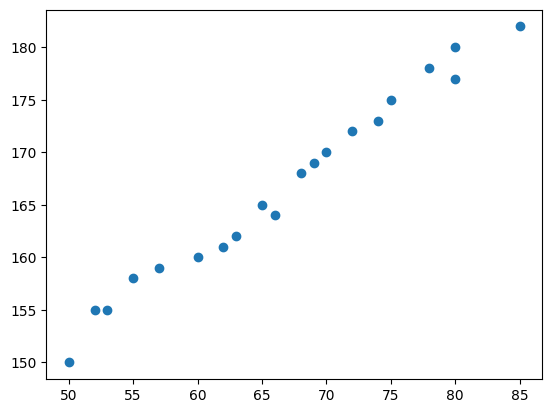

In [53]:
plt.scatter(df['Weight'], df['Height'])

In [54]:
df.corr()

,Height,Weight
Height,1.000000,0.991537
Weight,0.991537,1.000000


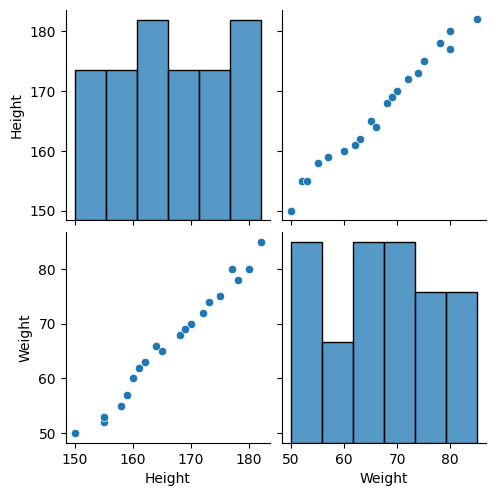

In [55]:
# Seaborn as visualization
import seaborn as sns
sns.pairplot(df)


In [56]:
# Independent and dependent features
x = df[['Weight']]  # Independent features should be data frame or 2 dimensional array
y = df['Height']    # This variable can be in series or 1d array

In [57]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [58]:
x_train.shape

(15, 1)

In [59]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

For Testing, we use only 'transform' because the mean and standard deviation of Training dataset and use it in 'Test'.

We do this because we don't our Training data to know anything about the Test Data, so that the model sees the Test Data as a new data.

Hence we calculate the mean and standard deviation only for Training Dataset.
This is called 'Data Leakage'

In [61]:
x_test = scaler.transform(x_test)
x_test

array([[-1.71684309],
       [ 1.33683039],
       [ 0.21715011],
       [-0.69895193],
       [ 0.52251746]])

# Important for input values for the model in the future
When a new value is being given to the model to predict it, it should also be standardized

Or Else it won't give the right/expected value and will give a bloated/unrealistic value

In [62]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [63]:
regression = LinearRegression()

In LinearRegression(normalize=True) - When we have not done the standardization

The output of LinearRegression is 'coef_', 'rank_', 'singular_', 'n_features_in_', 'feature_names_in_' and 'intercept_'.

*'coef_' and 'intercept_'* are the more important ones

In [64]:
regression.fit(x_train, y_train)

LinearRegression()

In [65]:
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)
# This is the Beta1 value/ Slope Value

Coefficient or slope:  [8.61135921]
Intercept:  167.0


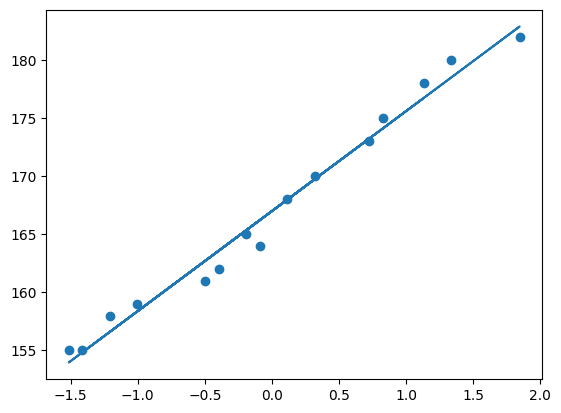

In [66]:
# Plot Training data plot best fit line
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

# Prediction of Test Data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 167 + 8.61(x_test)

In [67]:
# Prediction for Test Data
y_pred = regression.predict(x_test)

In [68]:
y_pred

array([152.21564745, 178.51192669, 168.86995763, 160.98107386,
       171.49958556])

In [69]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1.684969497396046
1.0678209615030425
1.2980637493574982


In [71]:
from sklearn.metrics import r2_score

In [72]:
score = r2_score(y_test, y_pred)
print(score)

0.9815729495035428


**98% Accuracy**

Now we are checking with the OLS linear Regression

In [74]:
# OLS Linear Regression
import statsmodels.api as sm

In [75]:
model = sm.OLS(y_train, x_train).fit()

In [76]:
prediction = model.predict(x_test)
print(prediction)

[-14.78435255  11.51192669   1.86995763  -6.01892614   4.49958556]


In [77]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.069
Method:                 Least Squares   F-statistic:                            0.03722
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                       0.850
Time:                        19:56:35   Log-Likelihood:                         -98.054
No. Observations:                  15   AIC:                                      198.1
Df Residuals:                      14   BIC:                                      198.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\sarve\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [80]:
regression.predict(scaler.transform([[72]]))

C:\Users\sarve\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([171.49958556])